# 1. Keras Start

- 1.1 Keras Basic(y = 3x + 10 Regression) - ANN(단층 레이어)
- 1.2 Keras MNIST - ANN(단층 레이어)
- 1.3 Keras MNIST - DNN(다층 레이어)

In [1]:
# Import Libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Keras Basic Y = 3X + 10 ANN Regression
- 이번 실습에서는 Keras를 이용하여 1차함수를 예측하는 학습 모델을 만들고, 성능을 평가한다.

### (1) 데이터셋 준비

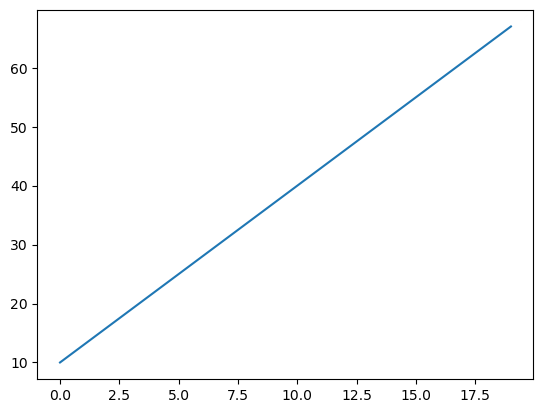

In [2]:
# Training Data
x = np.arange(20) # 0, 1, 2, 3, ...., 19
y = x * 3 + 10 # 10, 13, 16, 19, ..., 67
plt.plot(x,y)

# Testing Data 
x_test = np.arange(50,70) # 50, 51, 52, ..., 69
y_test = x_test * 3 + 10 # 160, 163, 166, ..., 217

# Dimension of input and output
n_in = 1
n_out = 1

### (2) Keras 모델링

- keras.layers : 모델을 구성하기 위한 layer들이 구현되어 있는 모듈

- keras.models : layer들을 묶어 모델을 정의하고 학습, 평가, 예측 등의 기능을 구현한 모듈

In [3]:
from tensorflow.keras import layers, models

Keras에서는 크게 Functional, Sequential 방식으로 모델을 구현

- Sequential : 모델에 필요한 layer들을 순차적으로 더해가는 방식으로 구현
- Function : 모델을 수식처럼 구현 

<Sequential에 사용되는 Layer>

- Dense : Fully Connected Layer (https://keras.io/layers/core/#dense)

### Sequential Modeling

In [10]:
def modeling_sequential(n_in, n_out):
    # Coding Time
    model = models.Sequential()
    model.add(layers.Dense(units = n_out, input_shape = (n_in,)))
    return model

In [11]:
class modeling_sequential_class(models.Sequential):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 선언
        self.n_in = n_in
        self.n_out = n_out
        
        #상속받은 Sequential 클래스 초기화 후 레이어 추가
        super().__init__()
        self.add(layers.Dense(units =n_out, input_shape=(n_in,)))

<Functional에 사용되는 Layer>

- Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

- Dense : Fully Connected Layer (https://keras.io/layers/core/#dense)

### Functional Modeling

In [13]:
def modeling_functional(n_in, n_out):
    # Coding Time
    x = layers.Input(shape = (n_in,))
    y = layers.Dense(n_out)(x)
    model = models.Model(inputs = x, outputs = y)
    return model

In [14]:
class modeling_functional_class(models.Model):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 및 레이어 선언
        self.n_in = n_in
        self.n_out = n_out
        input = layers.Input(shape=(n_in,))
        output = layers.Dense(n_out)
        
        # layer 연결
        x = input
        y = output(x)

        #상속받은 Model 클래스 초기화
        super().__init__(x, y)

### (2)-2 모델 시각화

model.summary()나 plot_model(model) 활용

In [15]:
model =  modeling_sequential(n_in, n_out)
model.summary()

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
model =  modeling_functional(n_in, n_out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


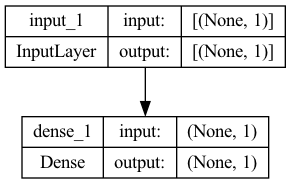

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### (3) 모델의 학습과정 설정(model.compile)
- model.compile(loss, optimizer, metrics)
- optimizer(str) : optimizer instance
- loss(str) : loss function
- metrics(str) : list of metrics to be evaluated by the model during training and testing
(https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [18]:
# Coding Time
model.compile(loss = 'mse', optimizer = 'sgd')

### (4) 모델 학습시키기(model.fit)

 - x : Input data
 - y : Label of training input data
 - batch_szie(int) : Number of samples per gradient update
 - steps_per_epoch(int) : Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
 - epochs(int) : Number of epochs to train the model
 - verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch
 - callbacks : List of callback instances
 - validation_split(float) : Fraction of the training data to be used as validation data
 - validation_data : (x_val, y_val)
 - shuffle(bool) : Whether to shuffle the training data before each epoch
 - history : 학습과정이 담겨있는 데이터 송출
 (https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [19]:
# Coding Time
history = model.fit(x, y, batch_size = 5, epochs = 100, validation_split = 0.2)

Epoch 1/100


2023-03-31 14:20:08.075271: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 1s 124ms/step - loss: 708.0519 - val_loss: 132.1130
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 25.5084 - val_loss: 22.5109
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 22.7455 - val_loss: 247.5247
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 63.1445 - val_loss: 176.9687
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 30.5093 - val_loss: 15.3890
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 29.2885 - val_loss: 1.2890
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 24.2863 - val_loss: 59.8875
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 20.8758 - val_loss: 29.0059
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 22.4547 - val_loss: 216.7619
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 23.2954 - val_loss: 128.5097
Epoch 11/100
4

4/4 [==============================] - 0s 8ms/step - loss: 0.7766 - val_loss: 16.7495
Epoch 84/100
4/4 [==============================] - 0s 8ms/step - loss: 5.2498 - val_loss: 0.1345
Epoch 85/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7491 - val_loss: 7.5044
Epoch 86/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8297 - val_loss: 0.6364
Epoch 87/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6716 - val_loss: 3.6643
Epoch 88/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6808 - val_loss: 2.8366
Epoch 89/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8112 - val_loss: 5.2432
Epoch 90/100
4/4 [==============================] - 0s 8ms/step - loss: 1.5928 - val_loss: 4.4003
Epoch 91/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7697 - val_loss: 3.4925
Epoch 92/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5755 - val_loss: 10.1662
Epoch 93/100
4/4 [=============

### (5) 모델 평가하기
모델 객체의 evaluate 함수로 test 데이터에 대한 모델의 성능을 평가
 - x : Input data
 - y : Label of testing input data
 - batch_size(int) : Number of samples per batch of computation
 - steps(int) : Total number of steps (batches of samples) before declaring the evaluation round finished
 - verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch

In [20]:
# Coding Time
loss = model.evaluate(x_test, y_test, batch_size = 20)
print('loss : %.4f' % (loss))


1/1 [==============================] - 0s 25ms/step - loss: 56.7090
loss : 56.7090


## (6) 모델 사용하기
모델 객체의 predict 함수로 input 데이터에 대한 모델의 예측결과를 반환
 - x : Input data
 - batch_size(int) : Number of samples per batch
 - steps(int) : Total number of steps (batches of samples) before declaring the prediction round finished
 - verbose : 0 = silent(recommend), 1 = progress bar, 2 = one line per epoch

In [21]:
new_x = np.arange(100, 120)
true_y = new_x * 3 + 10

pred_y = model.predict(new_x, batch_size=20, verbose = 0)
pred_y = np.reshape(pred_y,(-1,))
for y in zip(new_x, true_y, pred_y):
    print("x: %.2f,  y : %.2f,  y_predict : %.2f"%(y[0], y[1], y[2]))

x: 100.00,  y : 310.00,  y_predict : 323.28
x: 101.00,  y : 313.00,  y_predict : 326.43
x: 102.00,  y : 316.00,  y_predict : 329.57
x: 103.00,  y : 319.00,  y_predict : 332.71
x: 104.00,  y : 322.00,  y_predict : 335.86
x: 105.00,  y : 325.00,  y_predict : 339.00
x: 106.00,  y : 328.00,  y_predict : 342.14
x: 107.00,  y : 331.00,  y_predict : 345.29
x: 108.00,  y : 334.00,  y_predict : 348.43
x: 109.00,  y : 337.00,  y_predict : 351.57
x: 110.00,  y : 340.00,  y_predict : 354.72
x: 111.00,  y : 343.00,  y_predict : 357.86
x: 112.00,  y : 346.00,  y_predict : 361.00
x: 113.00,  y : 349.00,  y_predict : 364.15
x: 114.00,  y : 352.00,  y_predict : 367.29
x: 115.00,  y : 355.00,  y_predict : 370.43
x: 116.00,  y : 358.00,  y_predict : 373.58
x: 117.00,  y : 361.00,  y_predict : 376.72
x: 118.00,  y : 364.00,  y_predict : 379.86
x: 119.00,  y : 367.00,  y_predict : 383.00


## 1.2 MNIST Classification with Linear Classifier
이번 실습에서는 keras로 linear 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

In [22]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

### (1) 데이터셋 다운로드
### Download the MNIST dataset
MNIST dataset은 28x28 사이즈의 이미지들로 0~9까지의 숫자 10개의 손글씨 이미지로 이루어져있다.

60,000장이 training에 사용되고 10,000장이 test에 사용된다.

In [23]:
# Coding Time
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


label :  5


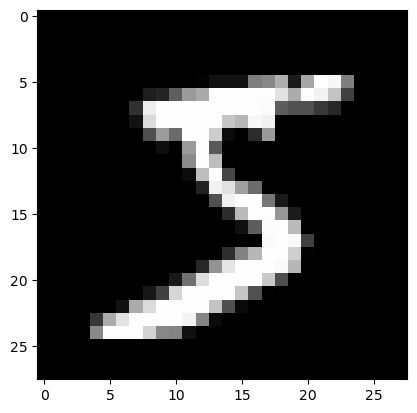

In [24]:
print('label : ',Y_train[0])
plt.imshow(X_train[0], cmap='gray')

In [25]:
# Coding Time
# Flatten and Normalization
X_train_flat = X_train.reshape(60000, 28 * 28).astype('float32') / 255.0
X_test_flat = X_test.reshape(10000, 28 * 28).astype('float32') / 255.0

# One-hot Encoding
Y_train_onehot = utils.to_categorical(Y_train)
Y_test_onehot = utils.to_categorical(Y_test)


print(Y_train_onehot)
print(X_train_flat.shape, Y_train_onehot.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 784) (60000, 10)


### (2) Keras 모델링

<사용되는 Layer>

- Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정(https://keras.io/layers/core/#input)

- Dense : Fully Connected Layer(https://keras.io/layers/core/#dense)

- Activation : Activation Function을 정의, 문자열로 입력(https://keras.io/layers/core/#activation)

In [26]:
n_in = 28*28   #784
n_out = np.shape(Y_test_onehot)[1] # 10

### Sequential Modeling

In [27]:
def linear_model_seq(n_in, n_out):
    # Coding Time
    model = Sequential()
    model.add(Dense(units = n_out, input_shape = (n_in,), activation = 'softmax'))

    return model

### Functional Modeling

In [28]:
def linear_model_func(n_in, n_out):
    # Coding Time
    x = Input(shape = (n_in,))
    h = Dense(n_out)(x)
    y = Activation('softmax')(h)
    model = Model(inputs = x, outputs = y)

    return model

In [29]:
model = linear_model_func(n_in, n_out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


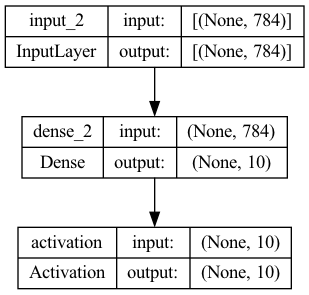

In [30]:
plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정
accuracy를 측정할 수 있는 문제라면 metric에 accuracy를 설정 (https://keras.io/models/model/)

In [31]:
# Coding Time
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])



## (4) 모델 학습시키기

In [32]:
# Coding Time
history = model.fit(X_train_flat, 
                    Y_train_onehot,
                   batch_size = 128,
                   epochs = 20,
                   validation_split = 0.2)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 1.4093 - accuracy: 0.6501 - val_loss: 0.9053 - val_accuracy: 0.8241
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.7974 - accuracy: 0.8288 - val_loss: 0.6601 - val_accuracy: 0.8579
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6438 - accuracy: 0.8520 - val_loss: 0.5627 - val_accuracy: 0.8688
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5706 - accuracy: 0.8628 - val_loss: 0.5089 - val_accuracy: 0.8764
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5263 - accuracy: 0.8695 - val_loss: 0.4751 - val_accuracy: 0.8823
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4961 - accuracy: 0.8743 - val_loss: 0.4506 - val_accuracy: 0.8863
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4738 - accuracy: 0.8778 - val_loss: 0.4325 - val_accuracy: 0.8905
Epoch 

## (5) 모델 평가하기

In [33]:
# Coding Time
loss_and_accuracy = model.evaluate(X_test_flat,
                                  Y_test_onehot,
                                  batch_size = 128)

print('loss : %.4f, accuracy : %.4f' % (loss_and_accuracy[0], loss_and_accuracy[1]))


79/79 [==============================] - 1s 6ms/step - loss: 0.3477 - accuracy: 0.9080
loss : 0.3477, accuracy : 0.9080


## (6) 모델 사용하기

1/1 [==============================] - 0s 297ms/step
real_label : 6, predict_label : 6
real_label : 6, predict_label : 6


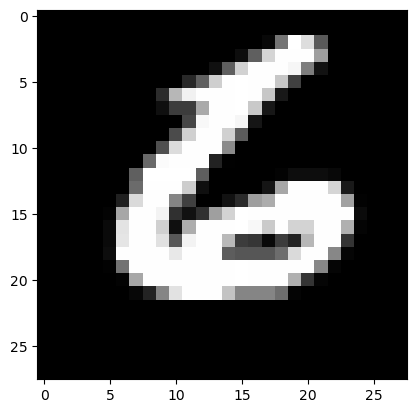

In [34]:
# Coding Time
test_data = X_test[-1].reshape(1, 28 * 28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('real_label : {}, predict_label : {}'.format(Y_test[-1], pred_y))
plt.imshow(X_test[-1], cmap='gray')

print('real_label : {}, predict_label : {}'.format(Y_test[-1], pred_y))
plt.imshow(X_test[-1], cmap='gray')

# 1.3 MNIST Classification with DNN (To Do)

모델의 설명을 보고 DNN 코드를 만들어보자

## (2) Keras 모델링

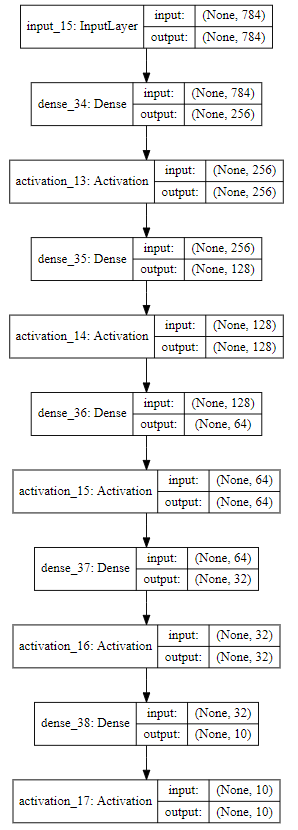

<맨 마지막 activation은 softmax로 하고 이외의 activation은 relu를 사용>

In [35]:
def DNN_seq(n_in, n_out):
    model = models.Sequential()
    model.add(layers.Dense(units = 256, input_shape = (n_in,), activation = 'relu'))
    model.add(layers.Dense(units = 128, input_shape = (256,), activation = 'relu'))
    model.add(layers.Dense(units = 64, input_shape = (128,), activation = 'relu'))
    model.add(layers.Dense(units = 32, input_shape = (64,), activation = 'relu'))
    model.add(layers.Dense(units = n_out, input_shape = (32,), activation = 'softmax'))
    return model




def DNN_func(n_in, n_out):
    x = Input(shape=(n_in,))
    x = Dense(256)(x)
    x = Activation('relu')(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dense(64)(x)
    x = Activation('relu')(x)
    x = Dense(32)(x)
    x = Activation('relu')(x)
    x = Dense(n_out)(x)
    y = Activation('softmax')(x)
    model = Model(inputs = x, outputs = y)
    return model



model = DNN_seq(n_in, n_out)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


## (3) 모델의 학습과정 설정
<optimizer를 adam으로 설정>

In [36]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics = ['accuracy'])

## (4) 모델 학습시키기
<batch size를 256, epoch을 30, train 데이터 중 30%를 validation 데이터로 사용, verbose 모드는 2>

In [37]:
 history = model.fit(X_train_flat,
                   Y_train_onehot,
                   batch_size = 256,
                   epochs = 30,
                   validation_split = 0.3,
                   verbose = 2)

Epoch 1/30
165/165 - 3s - loss: 0.4650 - accuracy: 0.8597 - val_loss: 0.2174 - val_accuracy: 0.9358 - 3s/epoch - 16ms/step
Epoch 2/30
165/165 - 2s - loss: 0.1561 - accuracy: 0.9536 - val_loss: 0.1509 - val_accuracy: 0.9557 - 2s/epoch - 10ms/step
Epoch 3/30
165/165 - 2s - loss: 0.1046 - accuracy: 0.9684 - val_loss: 0.1366 - val_accuracy: 0.9598 - 2s/epoch - 11ms/step
Epoch 4/30
165/165 - 2s - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.1228 - val_accuracy: 0.9641 - 2s/epoch - 11ms/step
Epoch 5/30
165/165 - 2s - loss: 0.0572 - accuracy: 0.9825 - val_loss: 0.1124 - val_accuracy: 0.9671 - 2s/epoch - 11ms/step
Epoch 6/30
165/165 - 2s - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.1034 - val_accuracy: 0.9701 - 2s/epoch - 10ms/step
Epoch 7/30
165/165 - 2s - loss: 0.0322 - accuracy: 0.9907 - val_loss: 0.1048 - val_accuracy: 0.9703 - 2s/epoch - 10ms/step
Epoch 8/30
165/165 - 2s - loss: 0.0266 - accuracy: 0.9921 - val_loss: 0.1213 - val_accuracy: 0.9678 - 2s/epoch - 10ms/step
Epoch 9/30
165/1

## (5) 모델 평가하기

In [39]:
loss_and_accuracy = model.evaluate(X_test_flat,
                                  Y_test_onehot,
                                  batch_size = 128)

print('loss : %.4f, accuracy : %.4f' % (loss_and_accuracy[0], loss_and_accuracy[1]))

79/79 [==============================] - 1s 7ms/step - loss: 0.1147 - accuracy: 0.9777
loss : 0.1147, accuracy : 0.9777


## (6) 모델 사용하기

1/1 [==============================] - 0s 14ms/step
real_label : 6, predict_label : 6


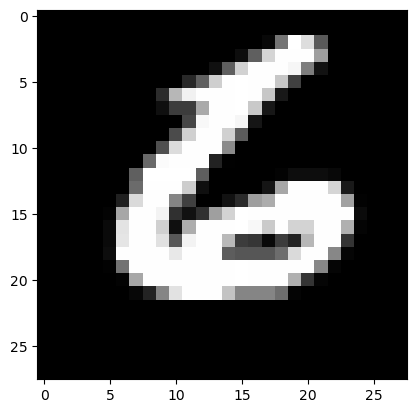

In [41]:
test_data = X_test[-1].reshape(1, 28 * 28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('real_label : {}, predict_label : {}'.format(Y_test[-1], pred_y))
plt.imshow(X_test[-1], cmap='gray')
